# Libary

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [27]:
dataset_path = ('C:\\Users\\fajar\\tbclassificatekkp')

In [28]:
IMAGE_WIDTH, IMAGE_HEIGHT = 150, 150
BATCH_SIZE = 16
EPOCHS = 8

In [29]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [30]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),  
    batch_size=BATCH_SIZE,
    class_mode='categorical',  
    subset='training'  
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1680 images belonging to 3 classes.
Found 420 images belonging to 3 classes.


In [31]:
#modeling cnn
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')  
])

In [32]:
#komparasi model cnn

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [33]:
# Latih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/8
105/105 [==============================] - 131s 1s/step - loss: 0.4917 - accuracy: 0.8143 - val_loss: 0.2669 - val_accuracy: 0.9135
Epoch 2/8
105/105 [==============================] - 121s 1s/step - loss: 0.1898 - accuracy: 0.9321 - val_loss: 0.2471 - val_accuracy: 0.8966
Epoch 3/8
105/105 [==============================] - 124s 1s/step - loss: 0.1112 - accuracy: 0.9631 - val_loss: 0.1812 - val_accuracy: 0.9303
Epoch 4/8
105/105 [==============================] - 121s 1s/step - loss: 0.1159 - accuracy: 0.9583 - val_loss: 0.2167 - val_accuracy: 0.9375
Epoch 5/8
105/105 [==============================] - 120s 1s/step - loss: 0.0896 - accuracy: 0.9726 - val_loss: 0.2326 - val_accuracy: 0.8870
Epoch 6/8
105/105 [==============================] - 122s 1s/step - loss: 0.0638 - accuracy: 0.9815 - val_loss: 0.2265 - val_accuracy: 0.9279
Epoch 7/8
105/105 [==============================] - 120s 1s/step - loss: 0.0659 - accuracy: 0.9798 - val_loss: 0.2459 - val_accuracy: 0.9279
Epoch 

In [2]:
#visual plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

Confusion matrix tanpa normalisasi
confusion matrix menggunakan notmalisasi


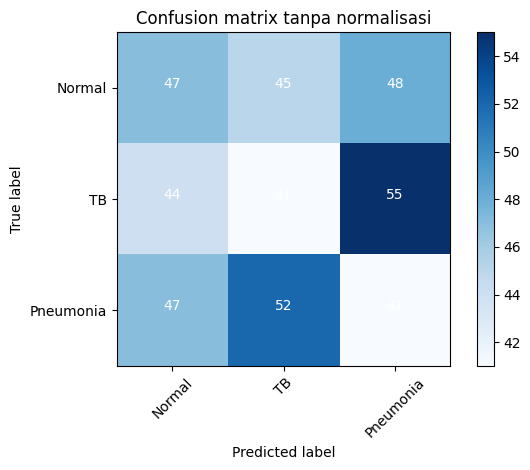

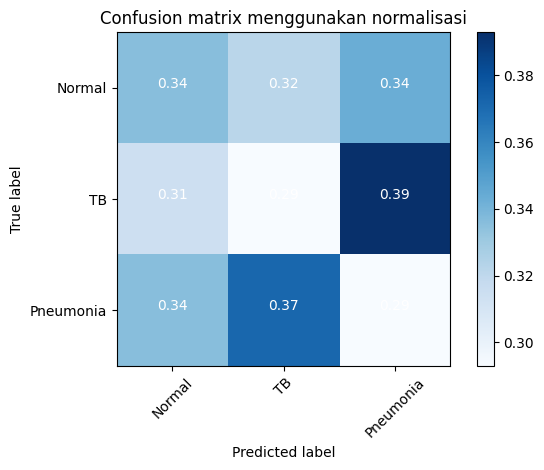

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix menggunakan notmalisasi")
    else:
        print('Confusion matrix tanpa normalisasi')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix tanpa normalisasi')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Confusion matrix menggunakan normalisasi')
plt.show()

In [37]:
Y_pred = model.predict(validation_generator, validation_generator.n // validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Normal', 'TB', 'Pneumonia']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


27/27 [==============================] - 10s 362ms/step
Confusion Matrix
[[56 44 40]
 [39 54 47]
 [48 41 51]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.39      0.40      0.40       140
          TB       0.39      0.39      0.39       140
   Pneumonia       0.37      0.36      0.37       140

    accuracy                           0.38       420
   macro avg       0.38      0.38      0.38       420
weighted avg       0.38      0.38      0.38       420



In [40]:
model.save('C:\\Users\\fajar\\modelkkp')

INFO:tensorflow:Assets written to: C:\Users\fajar\modelkkp\assets


INFO:tensorflow:Assets written to: C:\Users\fajar\modelkkp\assets
